# Project: Write a data Science Blog Post

#### Dataset from Kaggle
#### https://www.kaggle.com/chirag9073/netflix-data-analysis/data?select=netflix_titles.csv

#### References:
####    https://www.kaggle.com/chirag9073/netflix-data-analysis/notebook
####    https://www.kaggle.com/nammmx/netflix-content-exploratory-data-analysis/notebook

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

df = pd.read_csv('netflix_titles_2.csv', parse_dates = True)
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added  release_year  \
0  United States, India, South Korea, China   9-Sep-19          2019   
1                            United Kingdom   9-Sep-16          2016   
2                             United States   8-Sep-18          2013   
3                             United States   8-Sep-18          2016   
4                             United States   8-Sep-17          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

## Questions:
1. Understanding what content is available in different countries

2. Is Netflix increasingly focusing on TV rather than movies in recent years.

3. Analysis of TV Shows & Movies Content Ratings

In [127]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [128]:
df.shape

(6234, 12)

In [129]:
df.describe()

show_id  release_year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+07    2020.00000

In [130]:
# check for duplicate data
df.duplicated().sum()

0

In [131]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['added_year'] = df['date_added'].dt.year

## Taking care of missing data

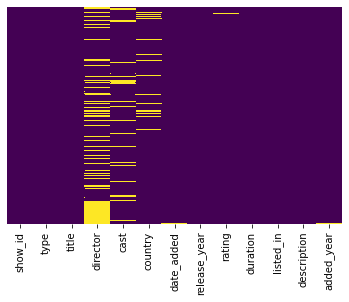

In [132]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

#### There are missing values for 'director', 'cast', 'country', 'rating', 'date_added'
#### We will impute (fill-in) the missing values with the mode (highest occuring value) of the respective columns for country, rating and release_year since mode works well with skewed dataset and with both numerical and categorical data.
#### We will replace NAN for added year with release year assuming the contents were added in the year they were released.
#### We will replace NAN for director and cast with 'value_missing' as this is not known and we would like to conserve the data which otherwise would be lost.

In [133]:
## Filling-in (imputing) missing values
df['added_year'] = df['added_year'].fillna(df['release_year'])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
print('count of values')
print(df.isnull().sum())

count of values
show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating             0
duration           0
listed_in          0
description        0
added_year         0
dtype: int64


In [19]:
#df.head()

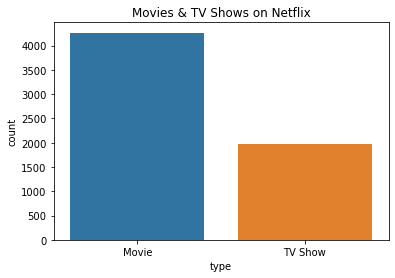

In [20]:
plt.title('Movies & TV Shows on Netflix')
sns.countplot(x='type', data=df);

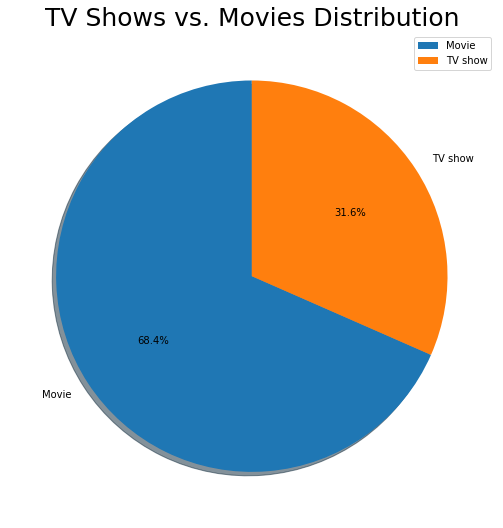

In [21]:
labels = ['Movie', 'TV show']
size = df['type'].value_counts()
plt.rcParams['figure.figsize'] = (9, 9)
#x=df['type'].value_counts().reset_index()
#plt.pie(x,values='type',names="index")
plt.pie(size, labels=labels, autopct= '%1.1f%%', shadow = True, startangle = 90)
plt.title('TV Shows vs. Movies Distribution', fontsize = 25)
plt.legend();

In [22]:
# change all object variables in dataset to categorical
# df.loc[:, df.dtypes == 'object'] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

# Question 1: Understanding what content is available in different countries

In [23]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1             value_missing   
2             value_missing   
3             value_missing   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added  release_year  \
0  United States, India, South Korea, China 2019-09-09          2019   
1                            United Kingdom 2016-09-09          2016   
2                             United States 2018-09-08          2013   
3                             United States 2018-09-08          2016   
4                             United States 2017-09-08          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  added_year  
0  Before planning an awesome wedding for his gra...      2019.0  
1  Jandino Asporaat riffs on the challenges of ra...      2016.0  
2  With the help of three human allies, the Autob...      2018.0  
3  When a prison ship crash unleashes hundreds of...      2018.0  
4  When nerdy high schooler Dani finally attracts...      2017.0

In [24]:
# Some movies are available in multiple countries
# Let's break the countries such that the country column has only one entry
# we will pick up the first country

In [25]:
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country']

0        United States
1       United Kingdom
2        United States
3        United States
4        United States
             ...      
6229     United States
6230     United States
6231     United States
6232    United Kingdom
6233     United States
Name: first_country, Length: 6234, dtype: object

In [26]:
df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

In [27]:
df['count']=1 
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:15]

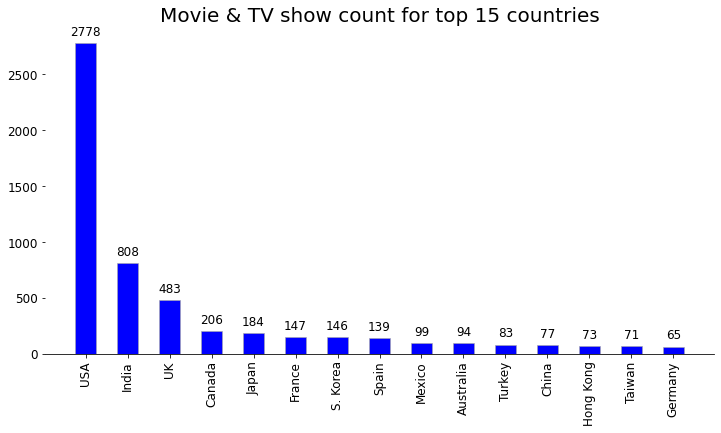

In [28]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(data.index,data,width=0.5,edgecolor='darkgray',linewidth=0.6, color = 'blue')
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Movie & TV show count for top 15 countries', fontsize = 20)
for i in data.index:
    ax.annotate(f"{data[i]}",xy=(i,data[i]+100),va='center',ha='center',fontweight='light',fontsize = 12)
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

In [29]:
## look at contents available in different countries

In [30]:
df['first_listing'] = df['listed_in'].apply(lambda x: x.split(",")[0])
df['first_listing']

0       Children & Family Movies
1                Stand-Up Comedy
2                       Kids' TV
3                       Kids' TV
4                       Comedies
                  ...           
6229       TV Action & Adventure
6230                 TV Comedies
6231                      Movies
6232            British TV Shows
6233           Classic & Cult TV
Name: first_listing, Length: 6234, dtype: object

In [31]:
listing = df.groupby('first_country')

In [32]:
data2 = df[df['type'] == 'Movie'].groupby('first_country')['count'].sum().sort_values(ascending=False)[:15]

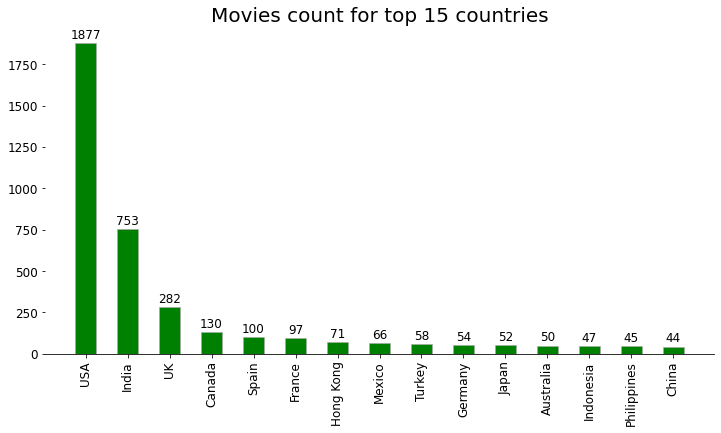

In [33]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(data2.index,data2,width=0.5,edgecolor='darkgray',linewidth=0.6, color = 'green')
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Movies count for top 15 countries', fontsize = 20)
for i in data2.index:
    ax.annotate(f"{data2[i]}",xy=(i,data2[i]+50),va='center',ha='center',fontweight='light',fontsize = 12)
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

In [34]:
##

In [35]:
data3 = df[df['type'] == 'TV Show'].groupby('first_country')['count'].sum().sort_values(ascending=False)[:15]

In [36]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(data3.index,data3,width=0.5,edgecolor='darkgray',linewidth=0.6, color = 'orange')
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('TV Shows count for top 15 countries', fontsize = 20)
for i in data3.index:
    ax.annotate(f"{data3[i]}",xy=(i,data3[i]+20),va='center',ha='center',fontweight='light',fontsize = 12)
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

In [37]:
from wordcloud import WordCloud

In [80]:
def wordcloud(data):
    plt.figure(figsize = (25,15))
    wordcloud = WordCloud(
    background_color = 'white',
             width = 1920,
             height = 1080
             ).generate(" ".join(data))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    return wordcloud
    

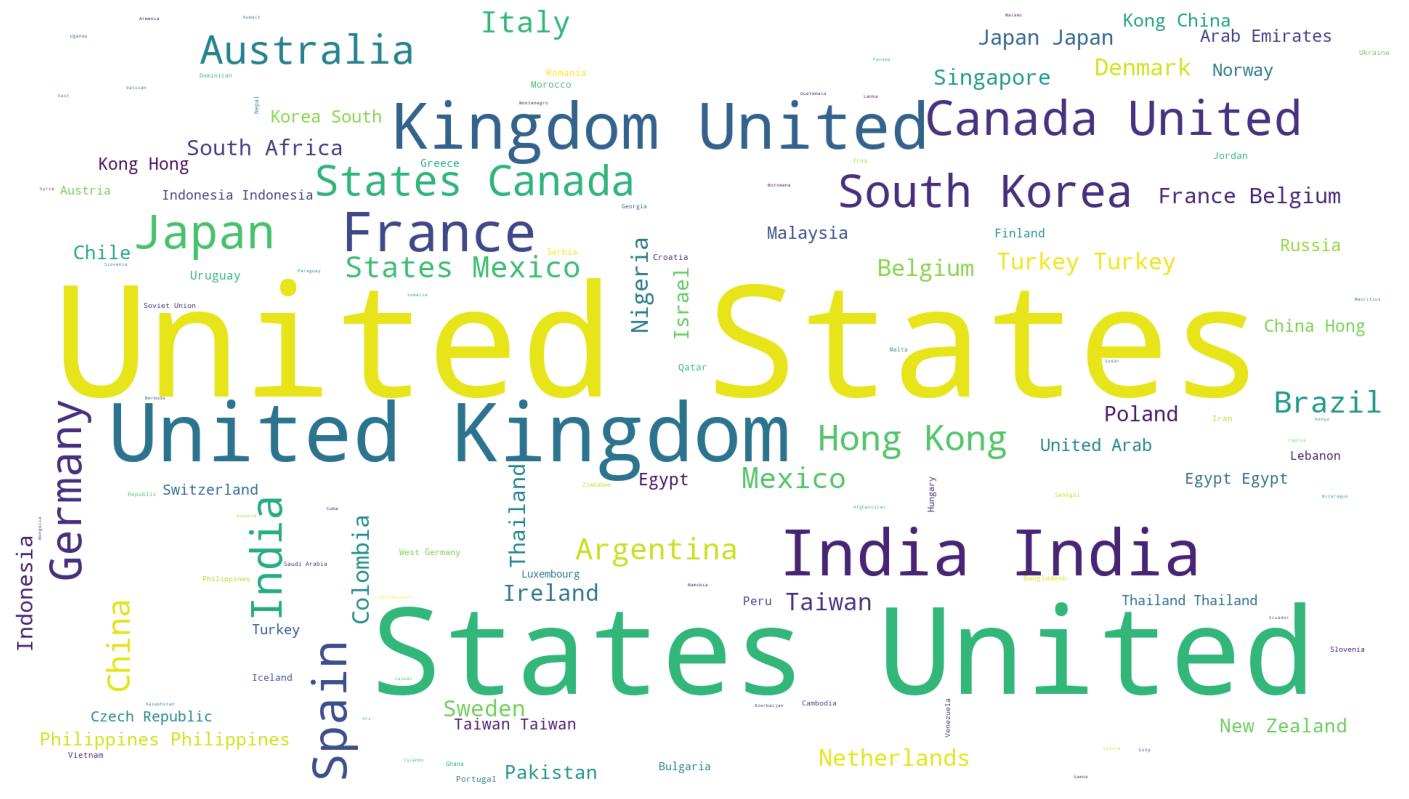

In [110]:
wordcloud(df.country);

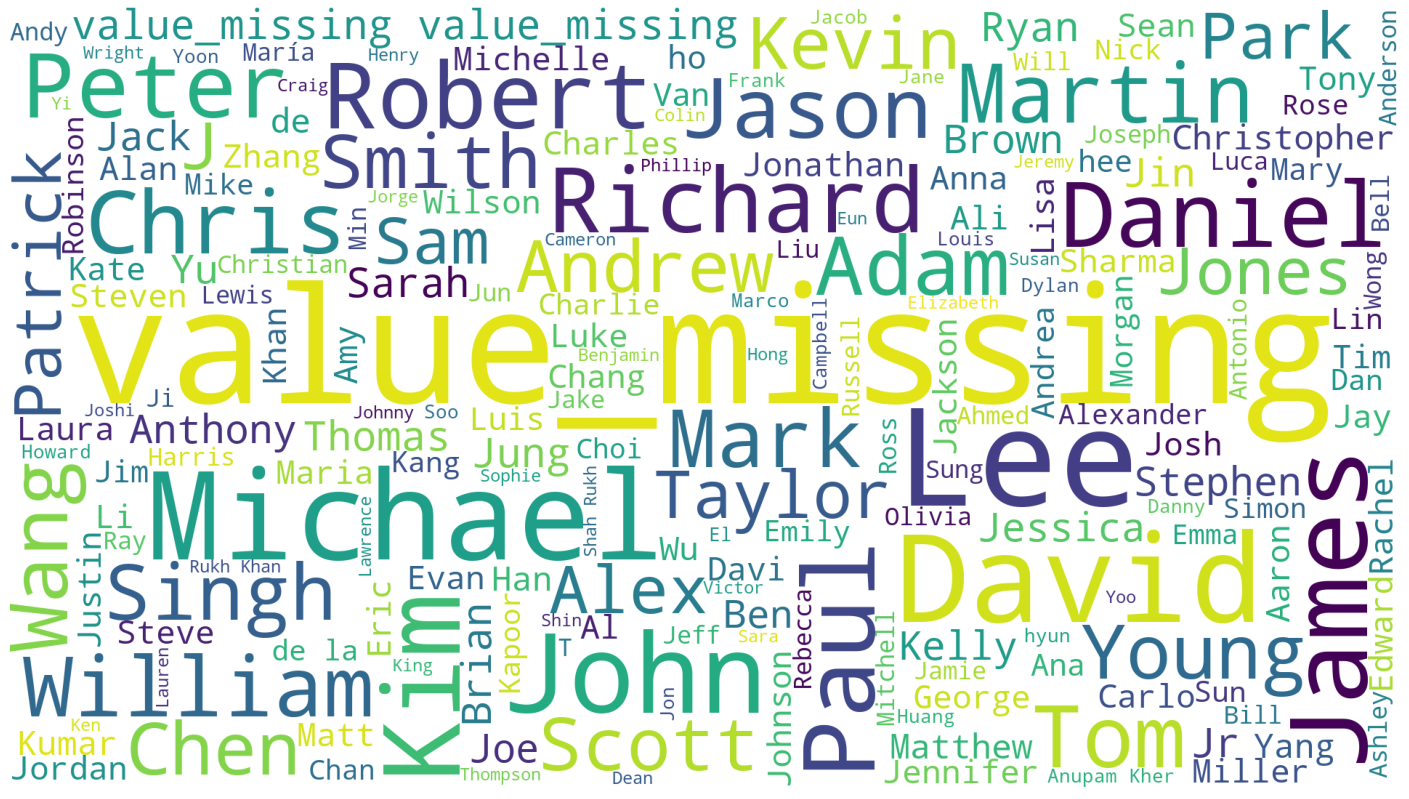

In [115]:
wordcloud(df.cast);

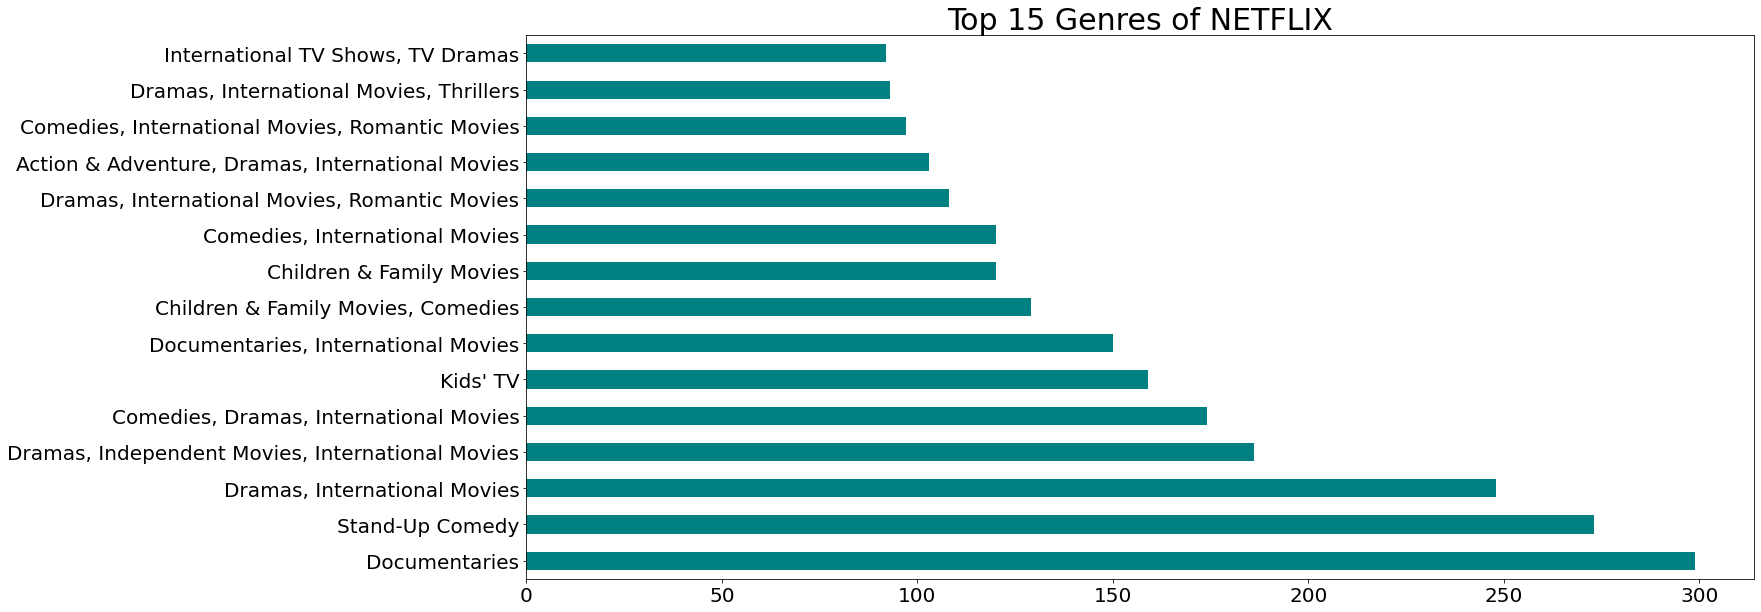

In [39]:
plt.figure(figsize=(22,10))
df["listed_in"].value_counts()[:15].plot(kind="barh", color="teal")
plt.title("Top 15 Genres of NETFLIX",size=30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20);

## 2. Is Netflix increasingly focusing on TV rather than movies in recent years.

In [42]:
df_release_post2000 = df[(df['release_year'] > 2000)]

In [43]:
df_post2000 = df[(df['added_year'] > 2000)]

Text(0.5, 1.0, 'TV Shows & Movies Released by Year')

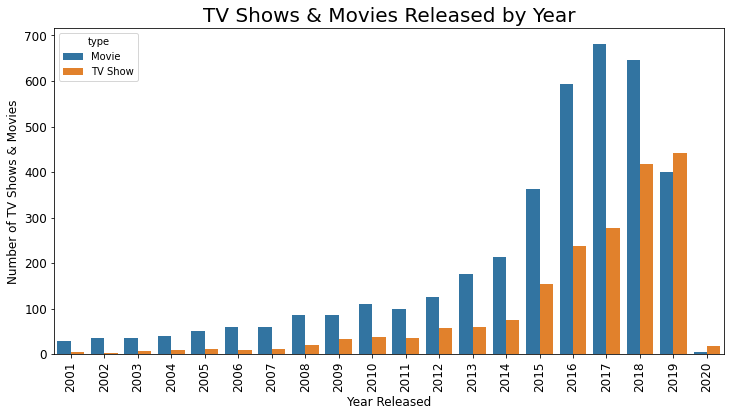

In [44]:
plt.figure(figsize = (12, 6))
sns.countplot(df_release_post2000['release_year'], hue = df_post2000['type'])
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel(xlabel = 'Year Released', fontsize = 12)
plt.ylabel(ylabel = 'Number of TV Shows & Movies', fontsize = 12)
plt.title('TV Shows & Movies Released by Year', fontsize = 20)

### There has been an increase in the release of both movies and TV shows till 2017. 
### Post 2017, the number of TV shows have been increasing at a greater rate. 
### Since 2019, the number of TV shows released surpassed the number of movies released, thereby indicating that more TV shows are released rather than movies in recent years.

Text(0.5, 1.0, 'TV Shows & Movies Added by Year')

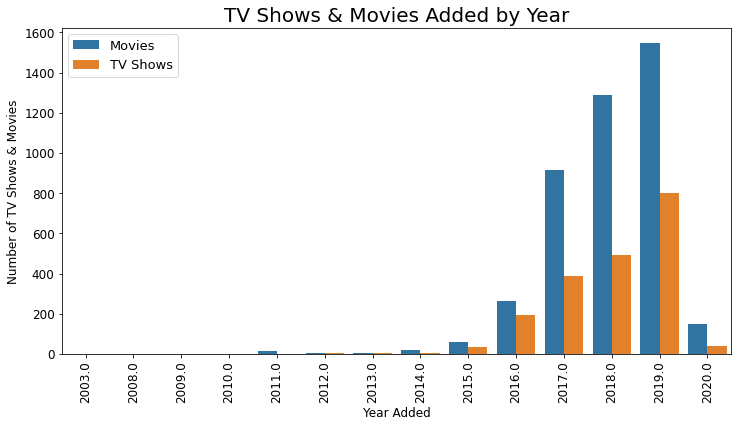

In [66]:
plt.figure(figsize = (12, 6))
sns.countplot(df_post2000['added_year'], hue = df_post2000['type'])
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel(xlabel = 'Year Added', fontsize = 12)
plt.ylabel(ylabel = 'Number of TV Shows & Movies', fontsize = 12)
plt.legend(labels=['Movies', 'TV Shows'], loc='upper left', prop={'size': 13})
plt.title('TV Shows & Movies Added by Year', fontsize = 20)
# for p in ax.patches:
#      ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=12);

In [47]:
# tv_proportion = df_post2000[(df['type'] == 'TV Show')].agg('count') / df_post2000['added_year'].agg('count')*100
# tv_proportion

In [48]:
#df_post2000.head()

In [49]:
df_movie = df_post2000[df_post2000['type'] == 'Movie']
df_tv = df_post2000[df_post2000['type'] == 'TV Show']
df_movie = df_movie.groupby('added_year').agg('count')
df_movie.reset_index(inplace=True)
df_tv = df_tv.groupby('added_year').agg('count')
df_tv.reset_index(inplace=True)

In [50]:
df_movie.rename(columns = {'type': 'type_movie'}, inplace = True)
df_movie.head()

added_year  show_id  type_movie  title  director  cast  country  \
0      2008.0        1           1      1         1     1        1   
1      2009.0        2           2      2         2     2        2   
2      2010.0        1           1      1         1     1        1   
3      2011.0       13          13     13        13    13       13   
4      2012.0        4           4      4         4     4        4   

   date_added  release_year  rating  duration  listed_in  description  \
0           1             1       1         1          1            1   
1           2             2       2         2          2            2   
2           1             1       1         1          1            1   
3          13            13      13        13         13           13   
4           4             4       4         4          4            4   

   first_country  count  first_listing  
0              1      1              1  
1              2      2              2  
2              1      1              1  
3             13     13             13  
4              4      4              4

In [51]:
df_tv.rename(columns = {'type': 'type_TV'}, inplace = True)
df_tv.head()

added_year  show_id  type_TV  title  director  cast  country  date_added  \
0      2003.0        2        2      2         2     2        2           0   
1      2008.0        2        2      2         2     2        2           1   
2      2010.0        1        1      1         1     1        1           0   
3      2012.0        4        4      4         4     4        4           3   
4      2013.0        7        7      7         7     7        7           6   

   release_year  rating  duration  listed_in  description  first_country  \
0             2       2         2          2            2              2   
1             2       2         2          2            2              2   
2             1       1         1          1            1              1   
3             4       4         4          4            4              4   
4             7       7         7          7            7              7   

   count  first_listing  
0      2              2  
1      2              2  
2      1              1  
3      4              4  
4      7              7

In [52]:
df_movie_tv = pd.concat([df_movie, df_tv])

In [53]:
df_movie_tv.fillna(value = 0, inplace = True) # either movie or TV

In [54]:
df_movie_tv_grouped = df_movie_tv.groupby(['added_year']).sum()

In [55]:
#df_movie_tv_grouped.head(25)

In [56]:
df_movie_tv_grouped['TV Proportions'] = df_movie_tv_grouped['type_TV']/(df_movie_tv_grouped['type_TV'] + df_movie_tv_grouped['type_movie'])

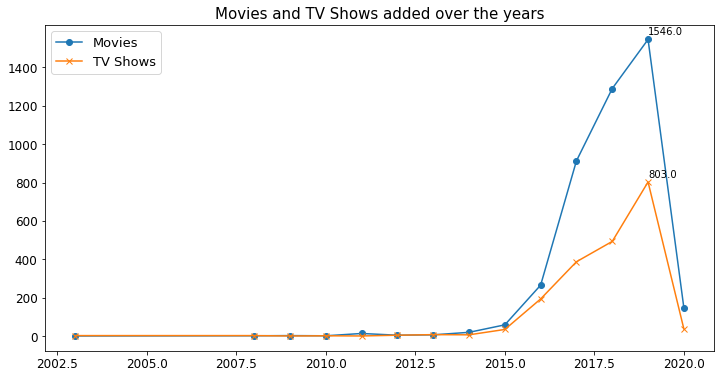

In [57]:
plt.figure(figsize = (12, 6))
plt.plot(df_movie_tv_grouped['type_movie'], marker='o')
plt.plot(df_movie_tv_grouped['type_TV'],  marker='x')

#define max values
y_max_movies = max(df_movie_tv_grouped['type_movie'])
y_max_tv = max(df_movie_tv_grouped['type_TV'])
x_max_movies = df_movie_tv_grouped['type_movie'].idxmax()
x_max_tv = df_movie_tv_grouped['type_TV'].idxmax()

#annotate max values
plt.annotate(str(y_max_movies), xy=(x_max_movies, y_max_movies), xytext=(0,5), textcoords='offset points')
plt.annotate(str(y_max_tv), xy=(x_max_tv, y_max_tv), xytext=(0,5), textcoords='offset points')
#labels
plt.yticks(np.arange(0, y_max_movies, step=200), fontsize = 12)
plt.xticks(fontsize = 12)
plt.legend(labels=['Movies', 'TV Shows'], loc='upper left', prop={'size': 13})
plt.title('Movies and TV Shows added over the years', fontsize=15)
plt.show()

In [58]:
plt.figure(figsize = (12, 6))
plt.plot(df_movie_tv_grouped['TV Proportions'], marker = 'o')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Year Added', fontsize = 12)
plt.ylabel('Proportion of TV Shows', fontsize = 12)
plt.title('Proportion of TV Shows by Year Added', fontsize = 15)

Text(0.5, 1.0, 'Proportion of TV Shows by Year Added')

In [67]:
# The contents added on Netflix has been increasing, for both movies and TV shows, till 2019. In 2020, there is a drop in
# the contents added. This corresponds to the fewer number of movies and TV shows released in 2020, probably due to
# the pandemic.
# While the number of movies and tv shows has been increasing till 2019, the proportion of tv shows has been declining.
# This indicates that Netflix is more focussed on movie releases in the recent years.

## 3. TV Shows & Movies Content Ratings Analysis

In [60]:
ratings_ages = {
    'TV-PG': 'Parental Guidance Suggested',
    'TV-MA': 'Mature Audience',
    'TV-Y7-FV': 'Older Children - Fantast Violence',
    'TV-Y7': 'Older Children',
    'TV-14': 'Parents Strongly Cautioned',
    'R': 'Restricted',
    'TV-Y': 'All Children',
    'NR': 'Not Rated',
    'PG-13': 'Parents Strongly Cautioned',
    'TV-G': 'General Audience',
    'PG': 'Parental Guidance Suggested',
    'G': 'General Audience',
    'UR': 'Unrated',
    'NC-17': 'Clearly Adults'
}
df['ratings_ages']=df['rating'].replace(ratings_ages)

In [62]:
x=df['ratings_ages'].value_counts().reset_index()
px.pie(df,names="ratings_ages",values=df.index, 
       title = 'TV Shows & Movies Ratings')

In [63]:
movies=df[df['type']=='Movie']
tv=df[df['type']=='TV Show']

In [64]:
px.pie(movies,names="ratings_ages",values=movies.index,
       title='Movies Ratings')

In [65]:
px.pie(tv,names='ratings_ages',values=tv.index,
       title='TV Shows Ratings')
